In [1]:
import numpy as np
import pandas as pd
import xarray as xr

np.random.seed(0)

In [2]:
np_array = np.random.rand(3, 4)
np_array

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492]])

In [3]:
# Accessing arrays by indexing
np_array[:2, :1]

array([[0.5488135],
       [0.4236548]])

In [4]:
arr = xr.DataArray(np_array, dims=('x', 'y'))
arr

<xarray.DataArray (x: 3, y: 4)>
array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492]])
Dimensions without coordinates: x, y

Accessing elements from a `DataArray` by indexing and using dimension names

In [6]:
arr.isel(x=1, y=3) # row index 1, col index 3

<xarray.DataArray ()>
array(0.891773)

In [7]:
arr[{'x': 1, 'y': 3}]

<xarray.DataArray ()>
array(0.891773)

In [8]:
ds = xr.Dataset(
    data_vars={
        'a': (('x', 'y'), np.random.rand(3, 4)),
        'b': (('x', 'y'), np.random.rand(3, 4))
    }
)
ds

<xarray.Dataset>
Dimensions:  (x: 3, y: 4)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.568 0.9256 0.07104 ... 0.7992 0.4615 0.7805
    b        (x, y) float64 0.1183 0.6399 0.1434 ... 0.5684 0.01879 0.6176

In [9]:
ds.isel(x=1, y=1)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    a        float64 0.8326
    b        float64 0.4147

In [11]:
ds.a[:2, :1] # values from the a data variable

<xarray.DataArray 'a' (x: 2, y: 1)>
array([[0.56804456],
       [0.0202184 ]])
Dimensions without coordinates: x, y

In [12]:
arr = xr.DataArray(
    np.random.rand(4, 6),
    dims=('x', 'y'),
    coords={
        'x': [-3.2, 2.1, 5.3, 6.5],
        'y': pd.date_range('2009-01-05', periods=6, freq='M')
    }
)
arr

<xarray.DataArray (x: 4, y: 6)>
array([[0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ,
        0.43703195],
       [0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256,
        0.1289263 ],
       [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384,
        0.10204481],
       [0.20887676, 0.16130952, 0.65310833, 0.2532916 , 0.46631077,
        0.24442559]])
Coordinates:
  * x        (x) float64 -3.2 2.1 5.3 6.5
  * y        (y) datetime64[ns] 2009-01-31 2009-02-28 ... 2009-05-31 2009-06-30

In [14]:
# Selecting elements based on the coordinates
arr.sel(x=5.3, y='2009-04-30')

<xarray.DataArray ()>
array(0.43860151)
Coordinates:
    x        float64 5.3
    y        datetime64[ns] 2009-04-30

In [15]:
# in case one of the values is not present in the coordinates, specify
# a method to be used to find an element
arr.sel(x=5.3, y='2009-04-30', method='nearest')

<xarray.DataArray ()>
array(0.43860151)
Coordinates:
    x        float64 5.3
    y        datetime64[ns] 2009-04-30

In [16]:
# ranges
arr.sel(x=[-3.2, 6.5], y=slice('2009-02-28', '2009-05-31'))

<xarray.DataArray (x: 2, y: 4)>
array([[0.616934  , 0.94374808, 0.6818203 , 0.3595079 ],
       [0.16130952, 0.65310833, 0.2532916 , 0.46631077]])
Coordinates:
  * x        (x) float64 -3.2 6.5
  * y        (y) datetime64[ns] 2009-02-28 2009-03-31 2009-04-30 2009-05-31

In [18]:
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

1. select the first 30 entries of latitude and 20th to 40th entries of longitud

In [30]:
# Select elements based on their position within the Dataset (indexing)
ds.isel(lat=slice(None, 30), lon=slice(20, 40))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 20)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 250.0 252.5 255.0 257.5 ... 290.0 292.5 295.0 297.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

2) Select all data at 75 North between Jan 1, 2013 and Oct 15, 2013

In [33]:
# Selecting using the values of the dimensions
ds.sel(lat=[75], time=slice('2013-01-01', '2013-10-15'))

<xarray.Dataset>
Dimensions:  (lat: 1, time: 1152, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-10-15T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [47]:
filtered = ds.sel(time='2013-01-01T00:00:00')
filtered

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Data variables:
    air      (lat, lon) float32 241.2 242.5 243.5 244.0 ... 296.9 296.8 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [51]:
# All of these methods work
# filtered.air
# filtered['air']
filtered.get('air').to_numpy()

array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
        238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
        239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
        241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
        294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
        295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
        296.6    ]], dtype=float32)

3) Remove all entries at 260 and 270 longitude

In [54]:
# Remove elements from the Dataset
ds.drop_sel(lon=[260, 270])

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 51)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

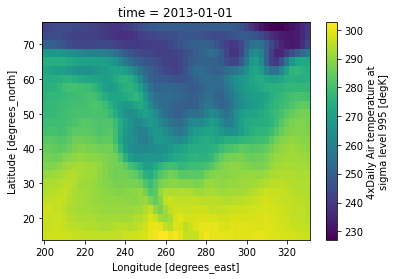

In [55]:
filtered['air'].plot()